C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


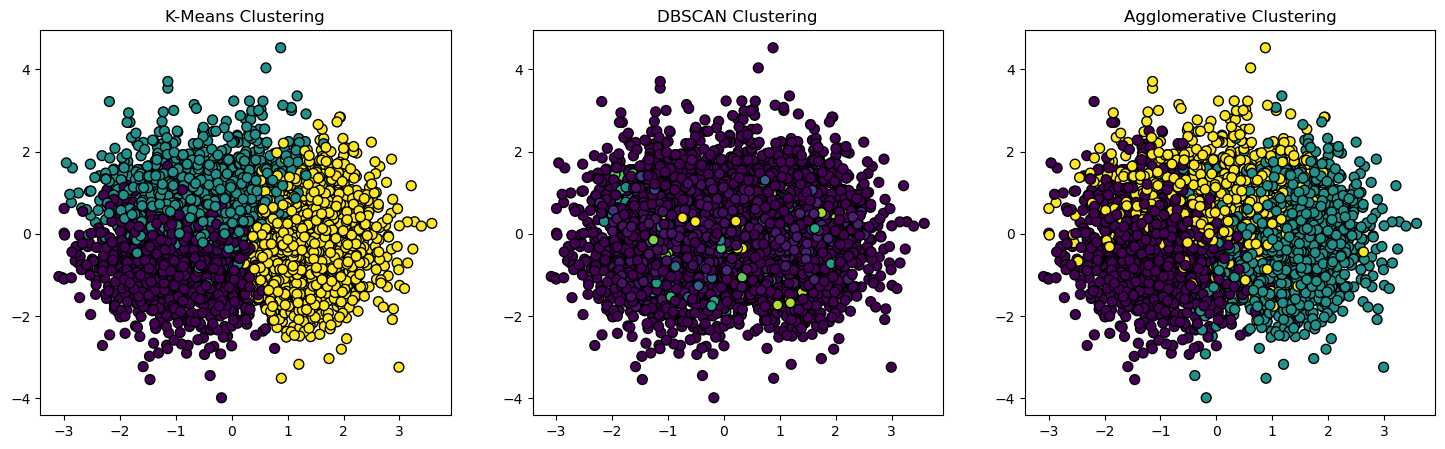

In [2]:
import pandas as pd
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'C:/Users/Sri sai murari/Desktop/USA_Housing.csv'
data = pd.read_csv(file_path)

# Drop the 'Address' column as it's not needed for clustering
data = data.drop(columns=['Address'])

# Standardize the features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data.drop(columns=['Price']))

# Reduce dimensionality for visualization purposes
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

# K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(data_scaled)

# DBSCAN Clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(data_scaled)

# Agglomerative Clustering
agglo = AgglomerativeClustering(n_clusters=3)
agglo_labels = agglo.fit_predict(data_scaled)

# Plotting the clustering results
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

axes[0].scatter(data_pca[:, 0], data_pca[:, 1], c=kmeans_labels, cmap='viridis', marker='o', edgecolor='k', s=50)
axes[0].set_title('K-Means Clustering')

axes[1].scatter(data_pca[:, 0], data_pca[:, 1], c=dbscan_labels, cmap='viridis', marker='o', edgecolor='k', s=50)
axes[1].set_title('DBSCAN Clustering')

axes[2].scatter(data_pca[:, 0], data_pca[:, 1], c=agglo_labels, cmap='viridis', marker='o', edgecolor='k', s=50)
axes[2].set_title('Agglomerative Clustering')

plt.show()